<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/demo_e_com_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.24.4
!pip install catboost==1.2


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import pearsonr, spearmanr, kendalltau

from wordcloud import WordCloud, STOPWORDS  # Модуль для создания облака слов
from collections import Counter  # Модуль для подсчета частоты слов



In [3]:
df = pd.read_csv('ORDERS.csv',encoding='ISO-8859-1')


In [4]:
df = df.drop(['ROWID','ORDERID','UNITPRICE','DATASET','CUSTOMERNAME','SHIPDATE'],axis=1)
df

,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,SHIPPINGCOSTS,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN
0,10/13/10,Low,6,261.5400,0.04,Regular Air,-213.25,35.00,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80
1,10/1/12,High,49,10123.0200,0.07,Delivery Truck,457.81,68.02,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58
2,10/1/12,High,27,244.5700,0.01,Regular Air,46.71,2.99,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39
3,7/10/11,High,30,4965.7595,0.08,Regular Air,1198.97,3.99,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58
4,8/28/10,Not Specified,19,394.2700,0.08,Regular Air,30.94,5.94,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8/9/10,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,66.27,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65
8395,8/9/10,Medium,23,392.5700,0.04,Regular Air,22.25,8.13,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38
8396,4/8/11,Not Specified,37,823.7800,0.03,Express Air,343.05,5.08,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41
8397,4/8/11,Not Specified,8,469.8375,0.00,Regular Air,-159.24,8.99,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORDERDATE           8399 non-null   object 
 1   ORDERPRIOTORITY     8399 non-null   object 
 2   ORDERQUANTITY       8399 non-null   int64  
 3   SALES               8399 non-null   float64
 4   DISCOUNT            8399 non-null   float64
 5   SHIPMODE            8399 non-null   object 
 6   PROFIT              8399 non-null   float64
 7   SHIPPINGCOSTS       8399 non-null   float64
 8   PROVINCE            8399 non-null   object 
 9   REGION              8399 non-null   object 
 10  CUSTOMERSEGMENT     8399 non-null   object 
 11  PRODUCTCATEGORY     8399 non-null   object 
 12  PRODUCTSUBCATEGORY  8399 non-null   object 
 13  PRODUCTNAME         8399 non-null   object 
 14  PRODUCTCONTAINER    8399 non-null   object 
 15  PRODUCTBASEMARGIN   8336 non-null   float64
dtypes: flo

In [6]:
df.describe()

,ORDERQUANTITY,SALES,DISCOUNT,PROFIT,SHIPPINGCOSTS,PRODUCTBASEMARGIN
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,25.571735,1775.878179,0.049671,181.184424,12.838557,0.512513
std,14.481071,3585.050525,0.031823,1196.653371,17.264052,0.135589
min,1.000000,2.240000,0.000000,-14140.700000,0.490000,0.350000
25%,13.000000,143.195000,0.020000,-83.315000,3.300000,0.380000
50%,26.000000,449.420000,0.050000,-1.500000,6.070000,0.520000
75%,38.000000,1709.320000,0.080000,162.750000,13.990000,0.590000
max,50.000000,89061.050000,0.250000,27220.690000,164.730000,0.850000


<Figure size 1200x800 with 0 Axes>

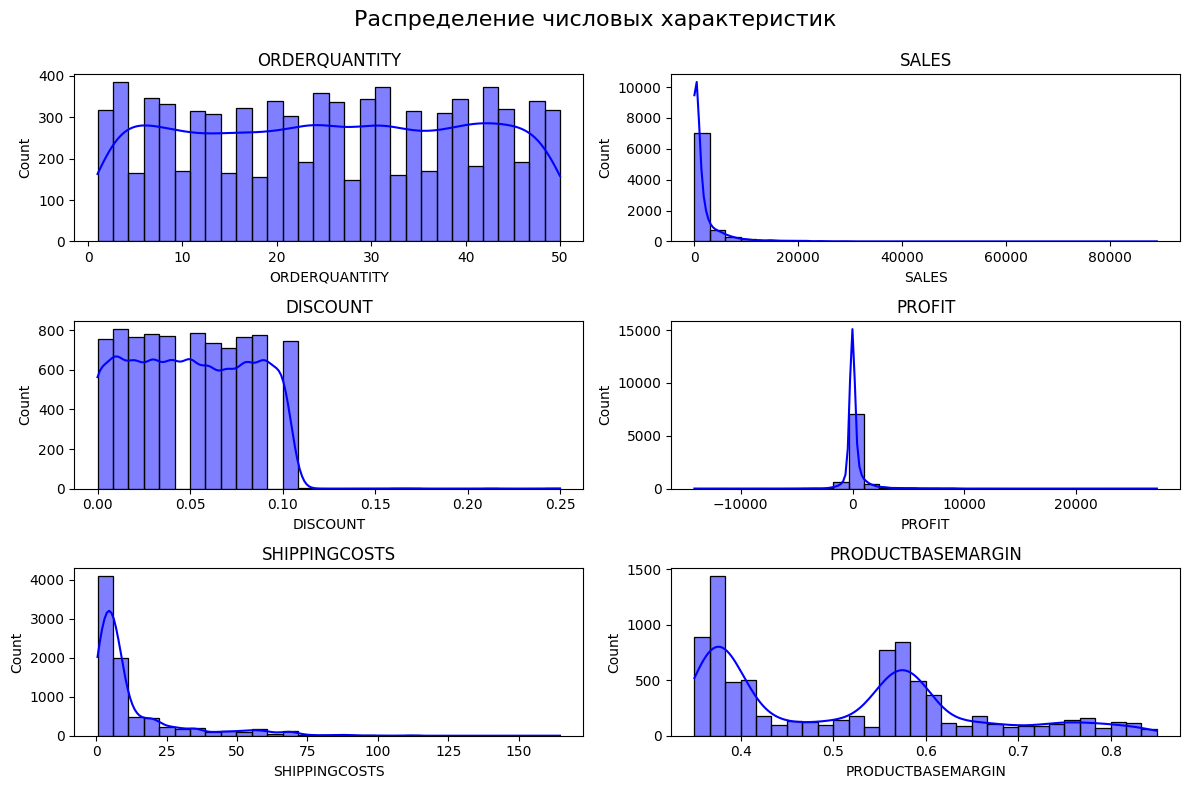

In [7]:

# Предполагаем, что df — это ваш DataFrame, содержащий соответствующие данные
numerical_cols = ["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]

# Игнорируем предупреждения FutureWarning, связанные с устаревшей опцией use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")

# Создание подграфиков для числовых столбцов
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(3, 2, figsize=(12, 8))  # Создаем сетку из 3x3 графиков
fig.suptitle("Распределение числовых характеристик", fontsize=16)  # Заголовок для всех графиков

# Проходим по каждому числовому столбцу и строим гистограмму с KDE-графиком
for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]  # Определяем положение графика в сетке 3x3
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color="blue")  # Строим гистограмму с KDE
    ax.set_title(col)  # Устанавливаем заголовок графика

# # Отключаем лишний график (поскольку у нас только 7 графиков, а сетка 3x3)
# axes[2, 2].axis('off')

plt.tight_layout()  # Оптимизируем расположение графиков
plt.subplots_adjust(top=0.9)  # Корректируем отступы, чтобы оставить место для заголовка
plt.show()  # Отображаем графики

In [8]:
# Выбираем только те колонки, которые имеют тип данных 'object' (строки)
object_columns = df.select_dtypes(include=['object']).columns

# Исключаем 'ORDERDATE' и 'SHIPDATE' из списка
object_columns = object_columns[~object_columns.isin(['ORDERDATE', 'SHIPDATE','PRODUCTCONTAINER','CUSTOMERNAME','PRODUCTNAME','DATASET'])]

# Выводим обновленный список
print(object_columns)


Index(['ORDERPRIOTORITY', 'SHIPMODE', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY'],
      dtype='object')


<ipython-input-9-cef8891d3670>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="deep", ax=ax)  # Строим столбчатую диаграмму
<ipython-input-9-cef8891d3670>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Поворачиваем подписи категорий для читаемости
<ipython-input-9-cef8891d3670>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="deep", ax=ax)  # Строим столбчатую диаграмму
<ipython-input-9-cef8891d3670>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

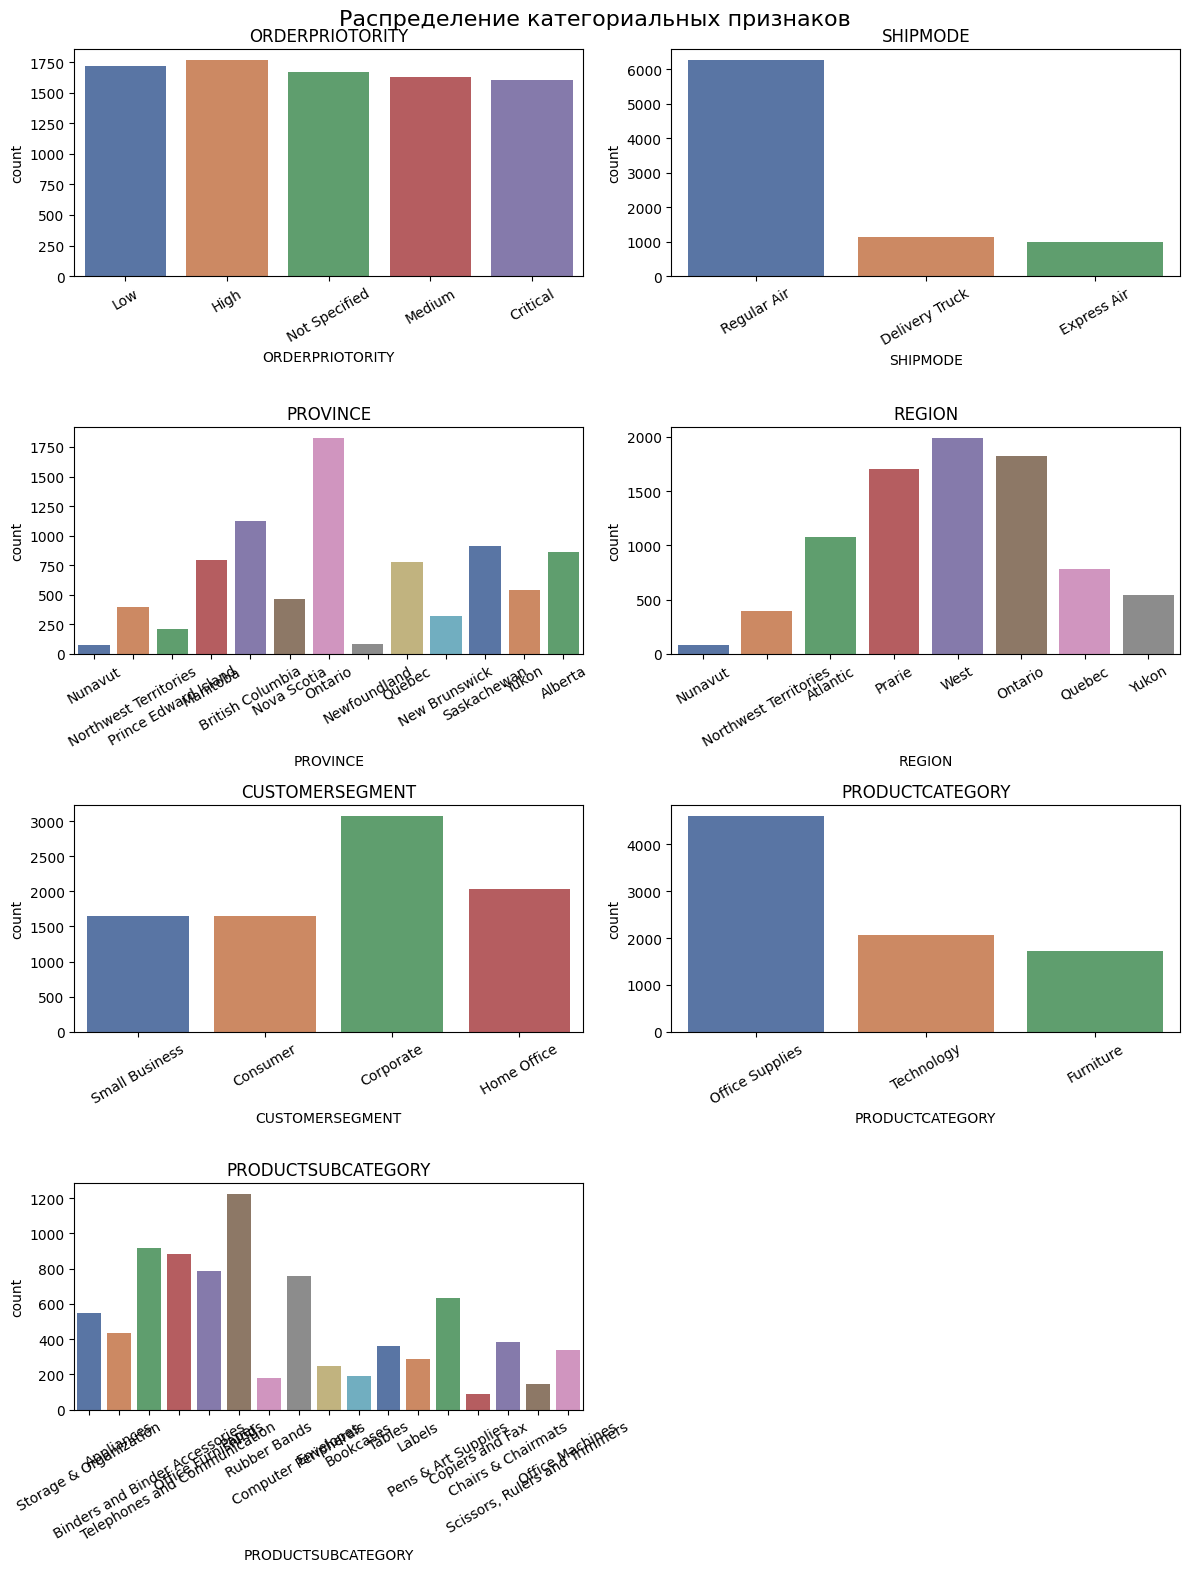

In [9]:
# Список категориальных столбцов, которые будем анализировать
categorical_cols = object_columns

# Создаем фигуру с 4 строками и 2 столбцами
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Устанавливаем общий заголовок для всех графиков
fig.suptitle("Распределение категориальных признаков", fontsize=16)

# Проходим по списку категориальных столбцов и строим графики
for idx, col in enumerate(categorical_cols):
    ax = axes[idx // 2, idx % 2]  # Определяем позицию графика в сетке 4x2
    sns.countplot(x=col, data=df, palette="deep", ax=ax)  # Строим столбчатую диаграмму
    ax.set_title(col)  # Устанавливаем заголовок графика
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Поворачиваем подписи категорий для читаемости

# Отключаем лишнюю ячейку (пустая ячейка в сетке 4x2)
axes[3, 1].axis('off')

# Оптимизируем расположение графиков
plt.tight_layout()

# Отображаем графики
plt.show()



Анализ диаграмм рассеяния


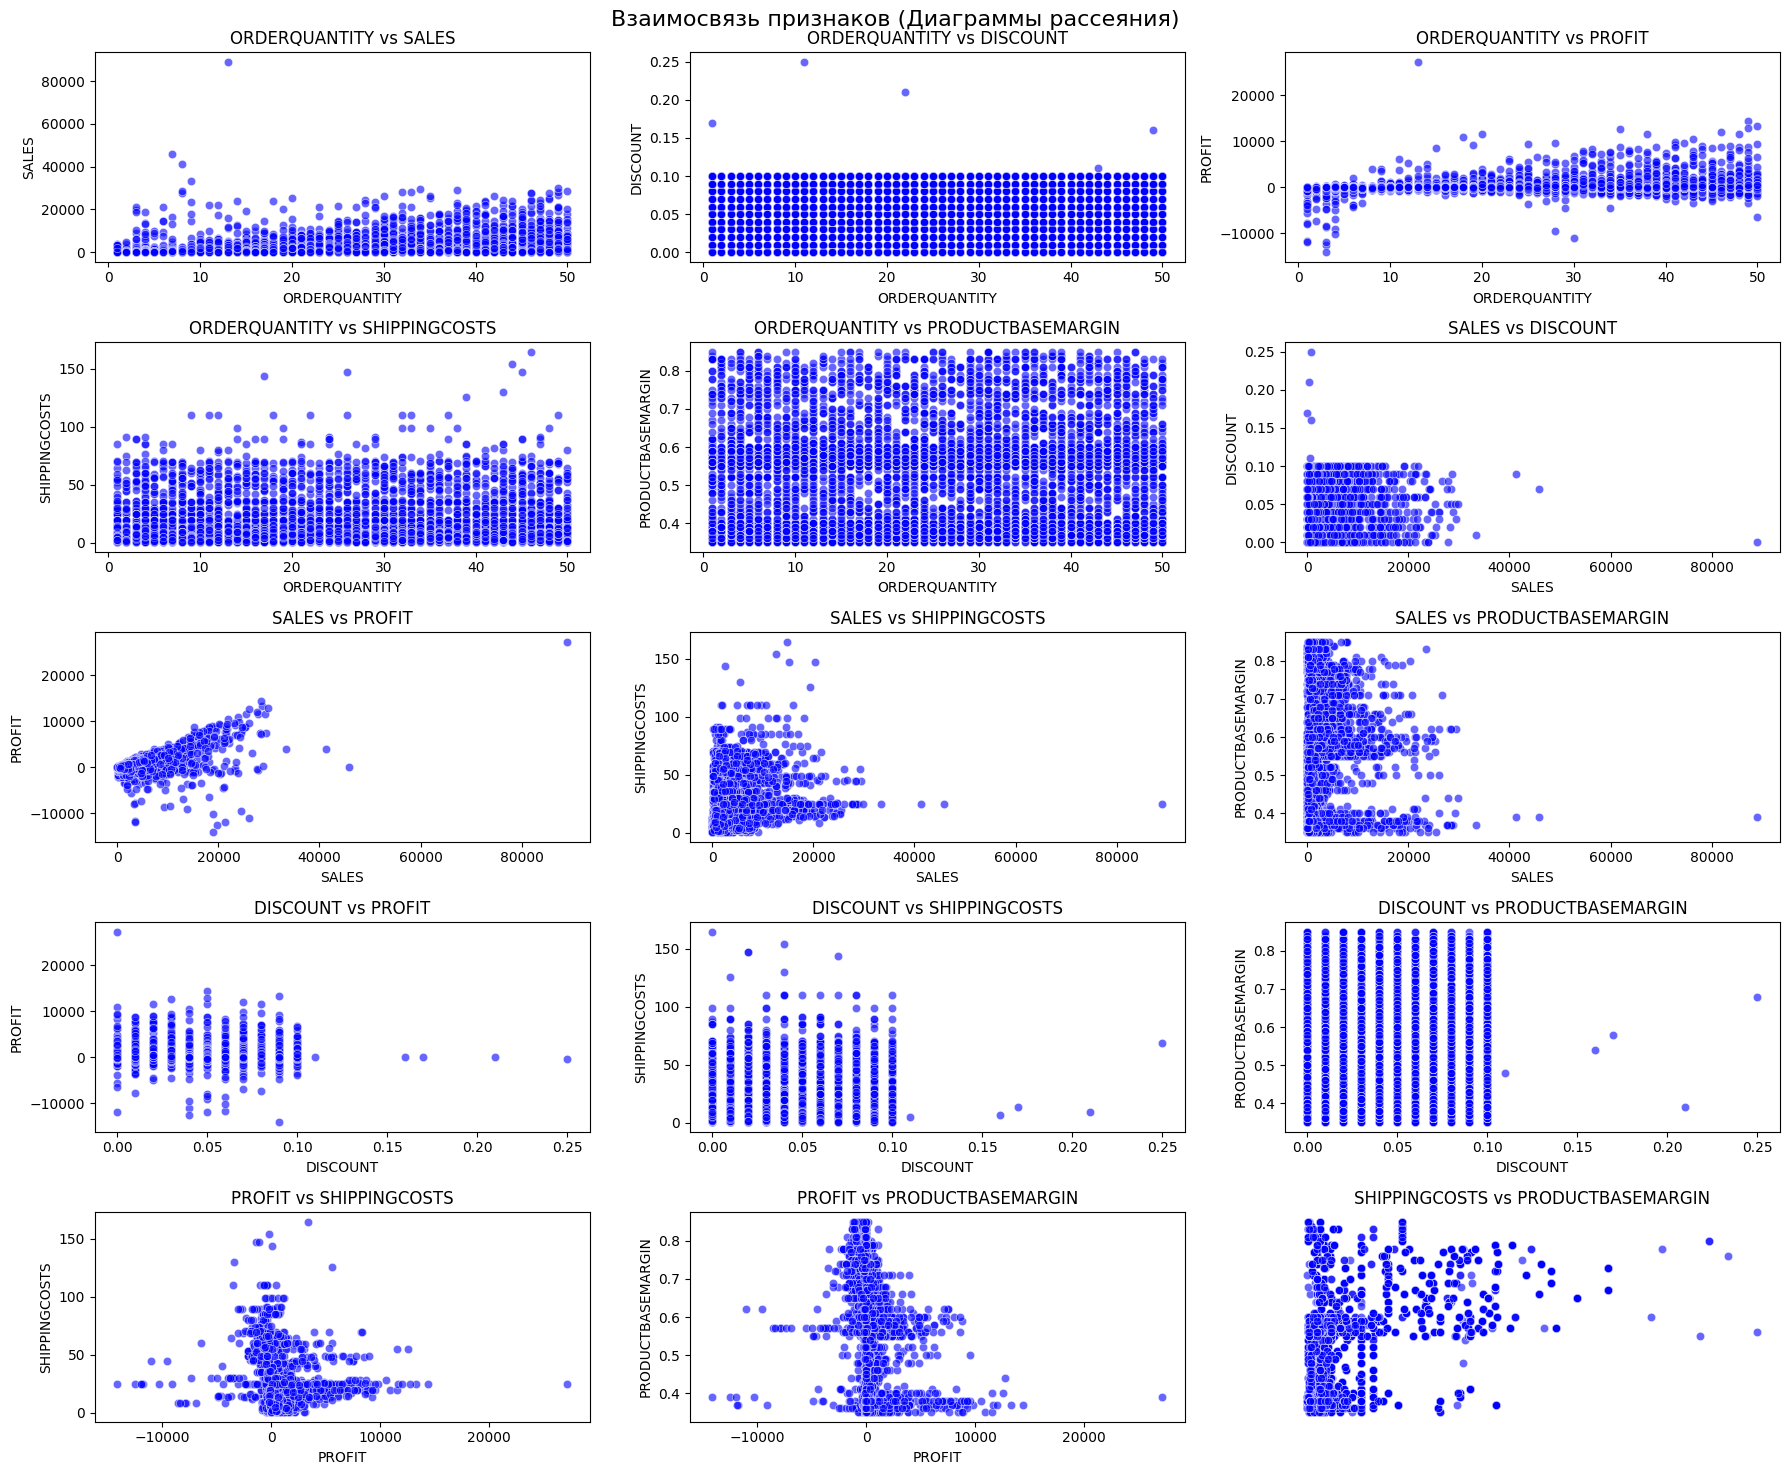

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем столбец 'Date' в формат datetime для корректной работы с датами

df["Date"] = pd.to_datetime(df["ORDERDATE"], format="%m/%d/%y")

# Выводим сообщение о начале анализа диаграмм рассеяния
print("\nАнализ диаграмм рассеяния")
# Список признаков для сравнения
features = ["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]

# Создаем список всех возможных пар признаков для построения графиков рассеяния
scatter_pairs = [(features[i], features[j]) for i in range(len(features)) for j in range(i + 1, len(features))]


# Создаем фигуру с 5 строками и 3 столбцами, задаем размер 18x15 дюймов
fig, axes = plt.subplots(5, 3, figsize=(18, 15))

# Устанавливаем общий заголовок для всех диаграмм рассеяния
fig.suptitle("Взаимосвязь признаков (Диаграммы рассеяния)", fontsize=16)

# Проходим по списку пар признаков и строим диаграммы рассеяния
for idx, (x, y) in enumerate(scatter_pairs):
    ax = axes[idx // 3, idx % 3]  # Определяем позицию графика в сетке 5x3
    sns.scatterplot(x=df[x], y=df[y], alpha=0.6, ax=ax, color="blue")  # Строим диаграмму рассеяния
    ax.set_xlabel(x)  # Устанавливаем подпись оси X
    ax.set_ylabel(y)  # Устанавливаем подпись оси Y
    ax.set_title(f"{x} vs {y}")  # Устанавливаем заголовок графика

# Отключаем лишние пустые ячейки (в последней строке)
axes[4, 2].axis('off')

# Оптимизируем расположение графиков для лучшего отображения
plt.tight_layout()

# Отображаем графики
plt.show()



Попарный статистический анализ


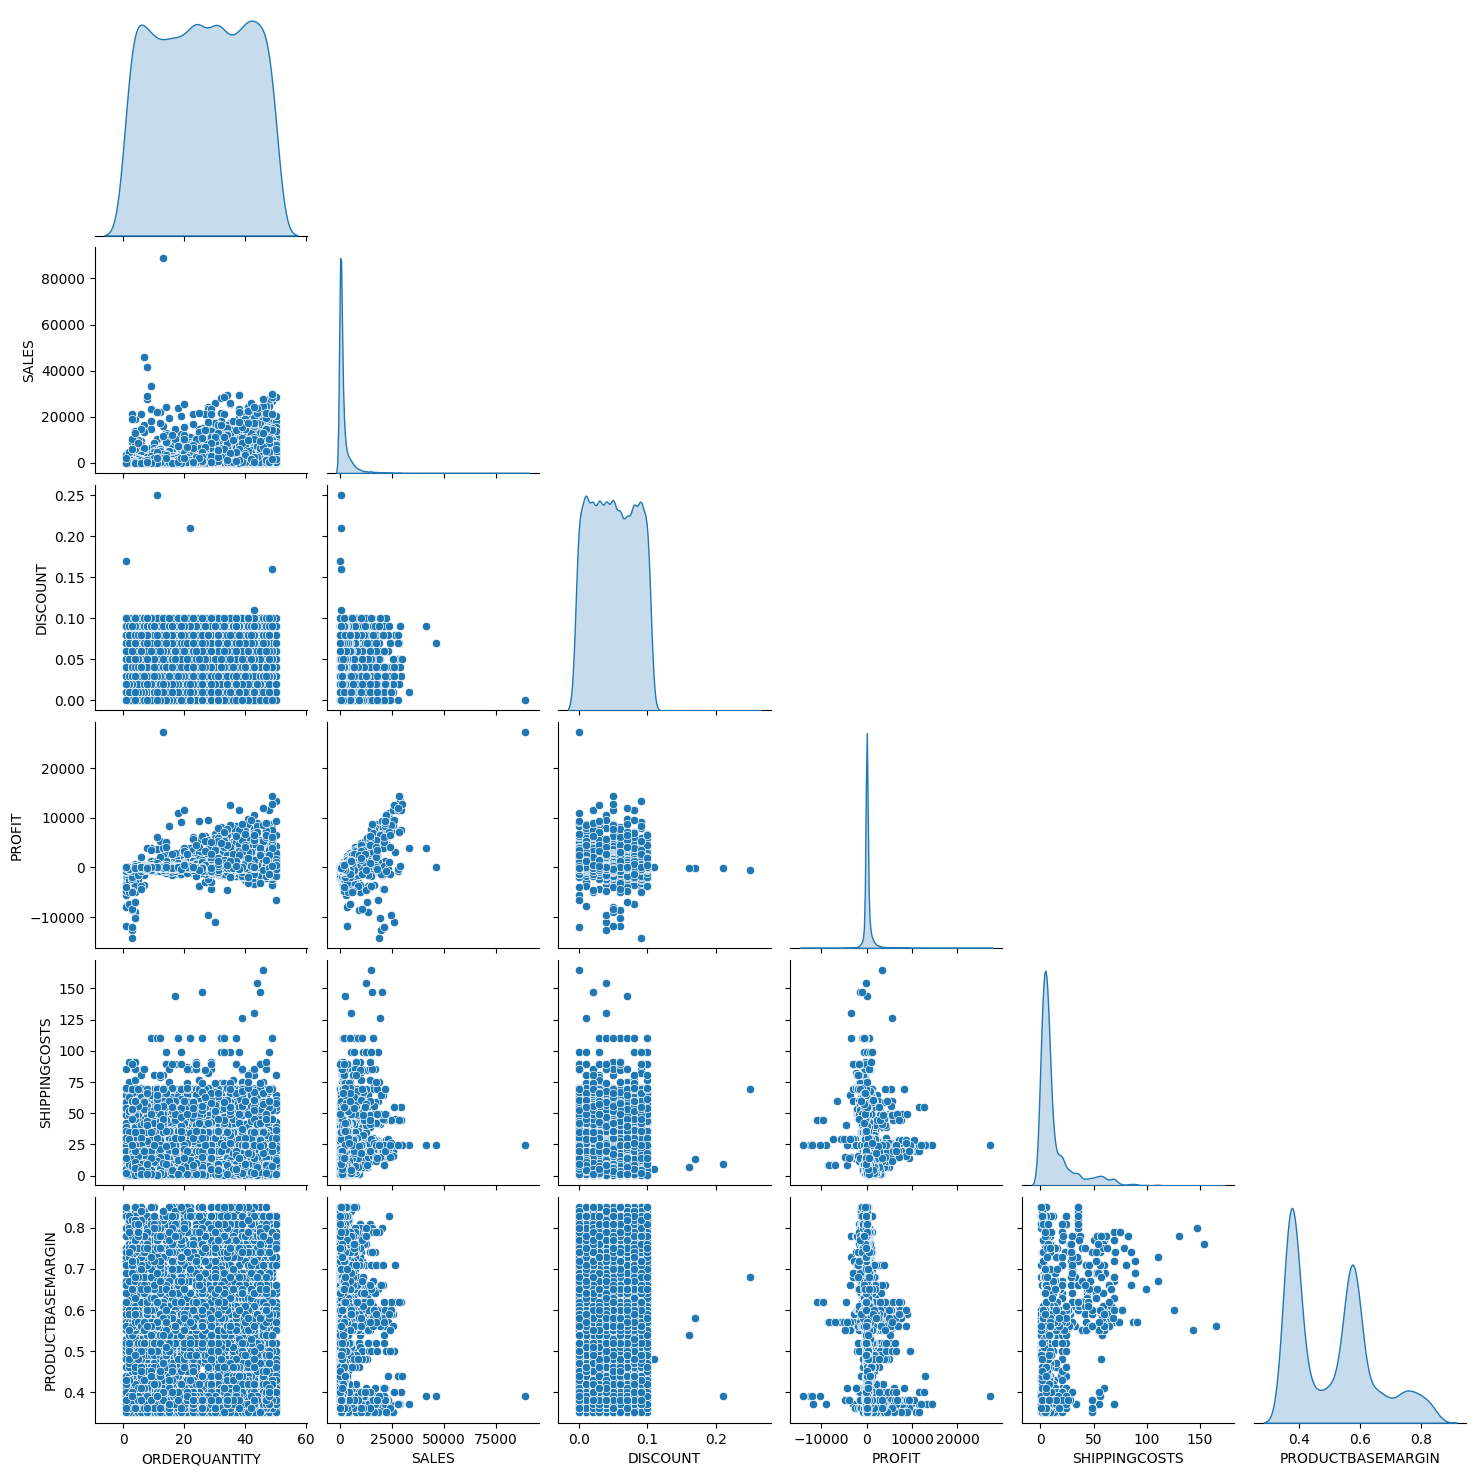

In [11]:
# Вывод заголовка анализа попарных статистических взаимосвязей
print("\nПопарный статистический анализ")

numerical_features = ["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]
pairwise_results = []

# Вычисление корреляции между всеми возможными парами числовых признаков
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1, feature2 = numerical_features[i], numerical_features[j]

        pearson_corr, _ = pearsonr(df[feature1], df[feature2])
        spearman_corr, _ = spearmanr(df[feature1], df[feature2])
        kendall_corr, _ = kendalltau(df[feature1], df[feature2])

        pairwise_results.append({
            "Feature 1": feature1,
            "Feature 2": feature2,
            "Pearson Correlation": round(pearson_corr, 2),
            "Spearman Correlation": round(spearman_corr, 2),
            "Kendall Correlation": round(kendall_corr, 2),
        })

# Строим попарные диаграммы рассеяния с KDE-графиками на диагонали
pairplot_cols = ["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]  # Select relevant columns
sns.pairplot(df[pairplot_cols], diag_kind="kde", corner=True)

# Отображаем график
plt.show()


Тепловая карта корреляций


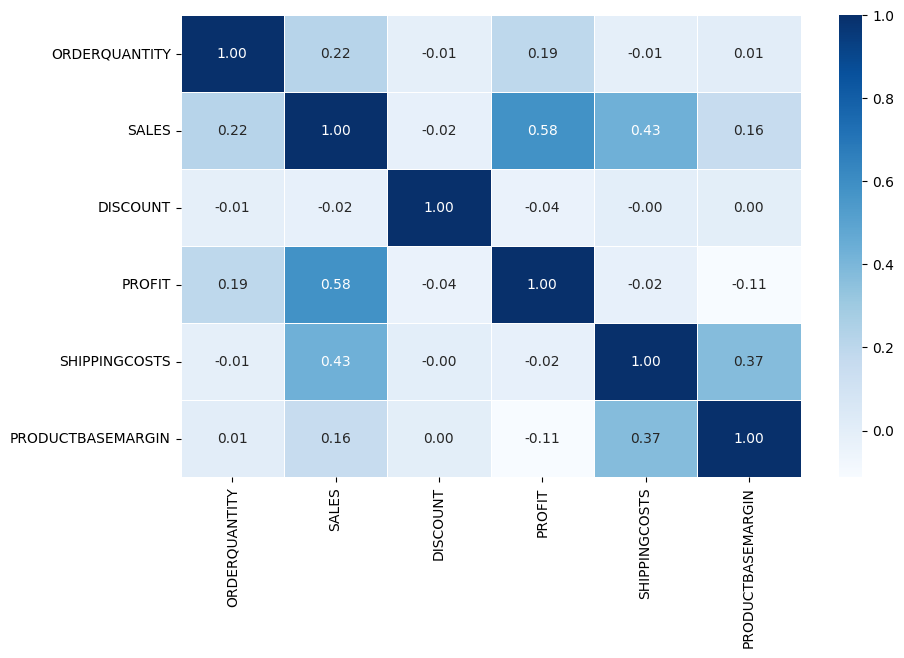

In [12]:
# Вывод заголовка анализа тепловой карты корреляций
print("\nТепловая карта корреляций")

# Создаем фигуру размером 10x6 дюймов
fig, ax = plt.subplots(figsize=(10, 6))

# Вычисляем корреляционную матрицу для числовых признаков
corr_matrix = df[["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]].corr()

# Строим тепловую карту корреляций
sns.heatmap(corr_matrix,  # Используем вычисленную корреляционную матрицу
            annot=True,  # Показываем значения внутри ячеек
            cmap="Blues",  # Используем цветовую палитру "Blues"
            fmt=".2f",  # Отображаем значения с двумя знаками после запятой
            linewidths=0.5,  # Добавляем линии между ячейками для читаемости
            ax=ax)  # Указываем ось для построения

# Отображаем график
plt.show()


Боксплоты с выделением выбросов


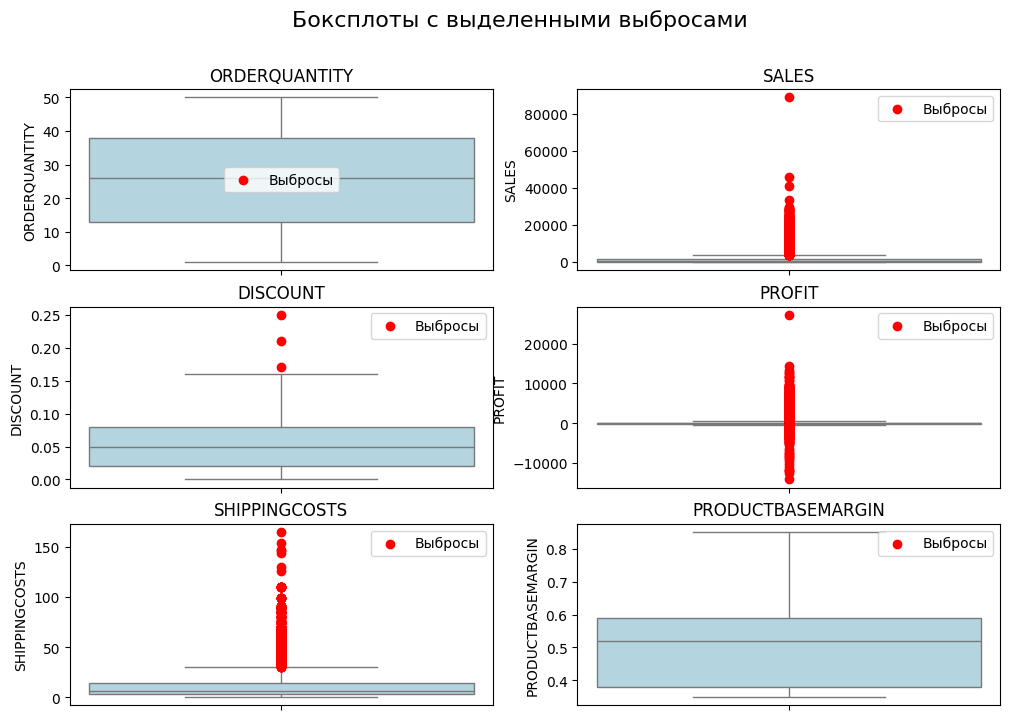

In [13]:
# Определяем числовые столбцы для анализа выбросов
numerical_cols = ["ORDERQUANTITY", "SALES", "DISCOUNT", "PROFIT", "SHIPPINGCOSTS", "PRODUCTBASEMARGIN"]

# Вывод заголовка для анализа выбросов с помощью boxplot
print("\nБоксплоты с выделением выбросов")

# Создаем 4 графика (2 строки, 2 столбца), размер 12x8 дюймов
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Устанавливаем общий заголовок для всех графиков
fig.suptitle("Боксплоты с выделенными выбросами", fontsize=16)

# Проходим по каждому числовому столбцу и строим boxplot с выбросами
for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]  # Определяем расположение графика в сетке 2x2

    # Рассчитываем межквартильный размах (IQR) для определения выбросов
    Q1 = df[col].quantile(0.25)  # Первый квартиль (25%)
    Q3 = df[col].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Размах межквартильного интервала
    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница выбросов
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница выбросов

    # Строим boxplot без стандартного отображения выбросов
    sns.boxplot(y=df[col], ax=ax, color="lightblue", showfliers=False)

    # Выделяем выбросы красными точками
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    ax.scatter([0] * len(outliers), outliers, color="red", label="Выбросы", zorder=3)

    # Устанавливаем заголовок и легенду для каждого графика
    ax.set_title(col)
    ax.legend()

# Отображаем графики
plt.show()

In [14]:

# Вывод заголовка метода Z-оценки для выявления выбросов
print("\nМетод Z-score для обнаружения выбросов")

# Устанавливаем пороговое значение Z-score для определения выбросов
z_threshold = 3  # Обычно используется пороговое значение 3

# Словарь для хранения выбросов по каждому числовому признаку
outliers_zscore = {}

# Проходим по каждому числовому признаку и вычисляем Z-score
for col in numerical_cols:
    # Вычисляем Z-score: (значение - среднее) / стандартное отклонение
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Фильтруем выбросы, у которых Z-score больше установленного порога
    outliers_zscore[col] = df[z_scores > z_threshold]

# Выводим количество обнаруженных выбросов для каждого признака
for col, outliers in outliers_zscore.items():
    print(f"{col} содержит {len(outliers)} потенциальных выбросов (метод Z-score).")

# Пояснение метода Z-score
print("Метод Z-score определяет выбросы, измеряя, на сколько стандартных отклонений значение отклоняется от среднего. "
      "Значения с Z-score > 3 считаются выбросами.")

# Выводим данные выбросов, обнаруженных методом Z-score
print("\nДанные выбросов, обнаруженные методом Z-score")
for col, outliers in outliers_zscore.items():
    if not outliers.empty:
        print(f"Выбросы в {col} (метод Z-score):")
        # print(outliers)



Метод Z-score для обнаружения выбросов
ORDERQUANTITY содержит 0 потенциальных выбросов (метод Z-score).
SALES содержит 208 потенциальных выбросов (метод Z-score).
DISCOUNT содержит 4 потенциальных выбросов (метод Z-score).
PROFIT содержит 178 потенциальных выбросов (метод Z-score).
SHIPPINGCOSTS содержит 229 потенциальных выбросов (метод Z-score).
PRODUCTBASEMARGIN содержит 0 потенциальных выбросов (метод Z-score).
Метод Z-score определяет выбросы, измеряя, на сколько стандартных отклонений значение отклоняется от среднего. Значения с Z-score > 3 считаются выбросами.

Данные выбросов, обнаруженные методом Z-score
Выбросы в SALES (метод Z-score):
Выбросы в DISCOUNT (метод Z-score):
Выбросы в PROFIT (метод Z-score):
Выбросы в SHIPPINGCOSTS (метод Z-score):


In [15]:
# Метод межквартильного размаха (IQR) для обнаружения выбросов
print("\nМетод межквартильного размаха (IQR)")

# Словарь для хранения выбросов по каждому числовому признаку
outliers_iqr = {}

# Проходим по каждому числовому столбцу и вычисляем выбросы с использованием метода IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # Первый квартиль (25%)
    Q3 = df[col].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Размах межквартильного интервала
    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница выбросов
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница выбросов

    # Фильтруем значения, выходящие за пределы IQR
    outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Выводим количество найденных выбросов для каждого признака
for col, outliers in outliers_iqr.items():
    print(f"{col} содержит {len(outliers)} потенциальных выбросов (метод IQR).")

# Пояснение метода IQR
print("Метод IQR определяет выбросы как значения, выходящие за пределы 1.5× межквартильного размаха "
      "за границами Q1 и Q3.")

# Выводим найденные выбросы
print("\nДанные выбросов, обнаруженные методом IQR")
for col, outliers in outliers_iqr.items():
    if not outliers.empty:
        print(f"Выбросы в {col} (метод IQR):")
        # print(outliers)



Метод межквартильного размаха (IQR)
ORDERQUANTITY содержит 0 потенциальных выбросов (метод IQR).
SALES содержит 1042 потенциальных выбросов (метод IQR).
DISCOUNT содержит 3 потенциальных выбросов (метод IQR).
PROFIT содержит 1704 потенциальных выбросов (метод IQR).
SHIPPINGCOSTS содержит 972 потенциальных выбросов (метод IQR).
PRODUCTBASEMARGIN содержит 0 потенциальных выбросов (метод IQR).
Метод IQR определяет выбросы как значения, выходящие за пределы 1.5× межквартильного размаха за границами Q1 и Q3.

Данные выбросов, обнаруженные методом IQR
Выбросы в SALES (метод IQR):
Выбросы в DISCOUNT (метод IQR):
Выбросы в PROFIT (метод IQR):
Выбросы в SHIPPINGCOSTS (метод IQR):


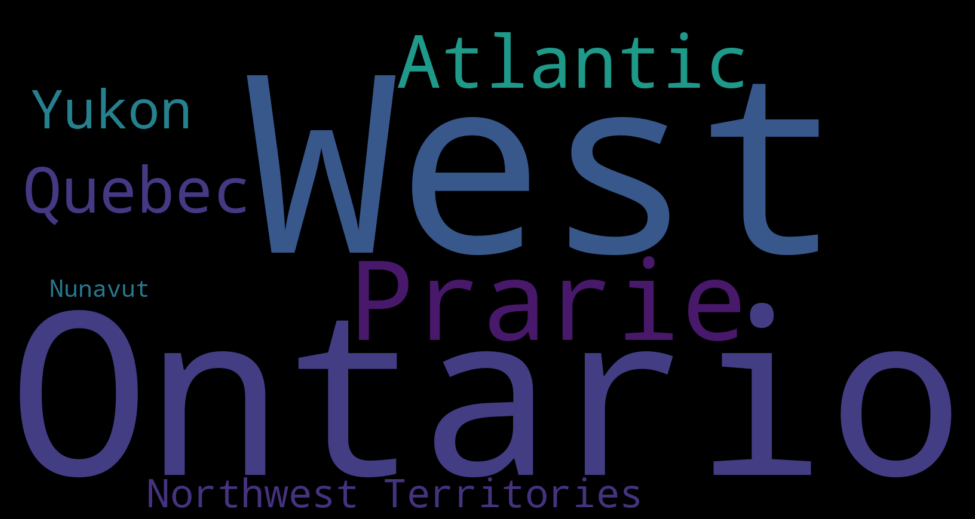

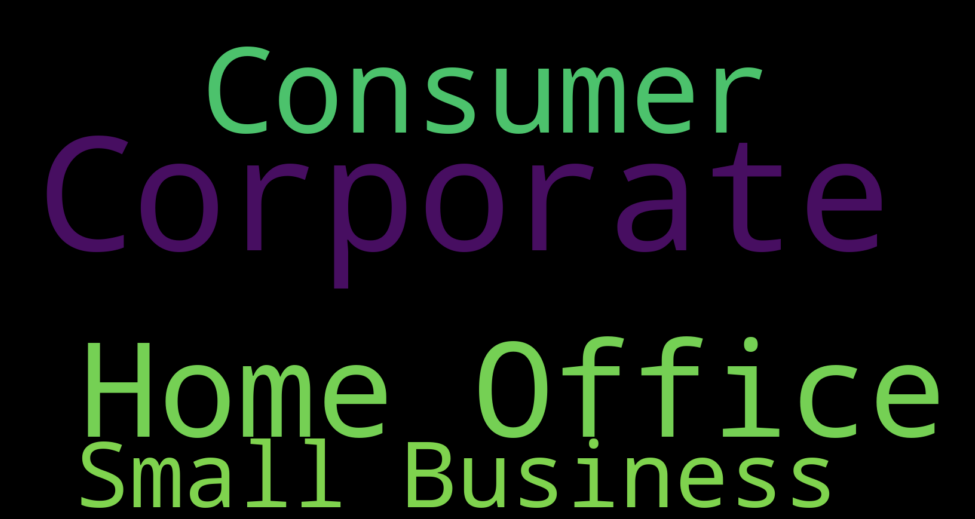

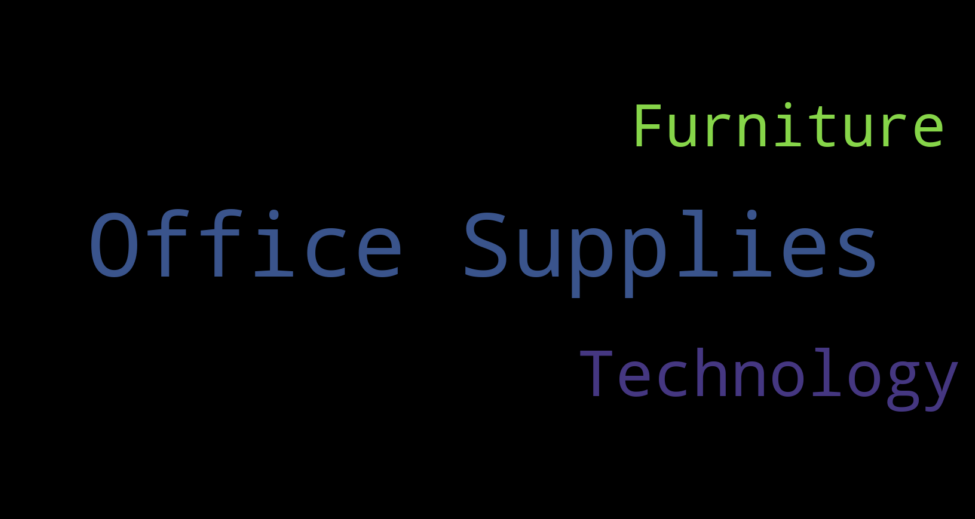

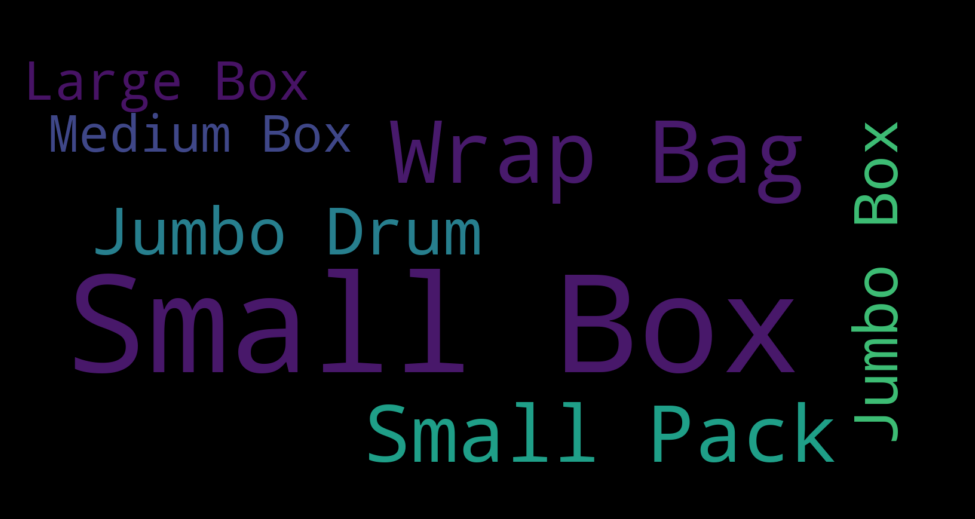

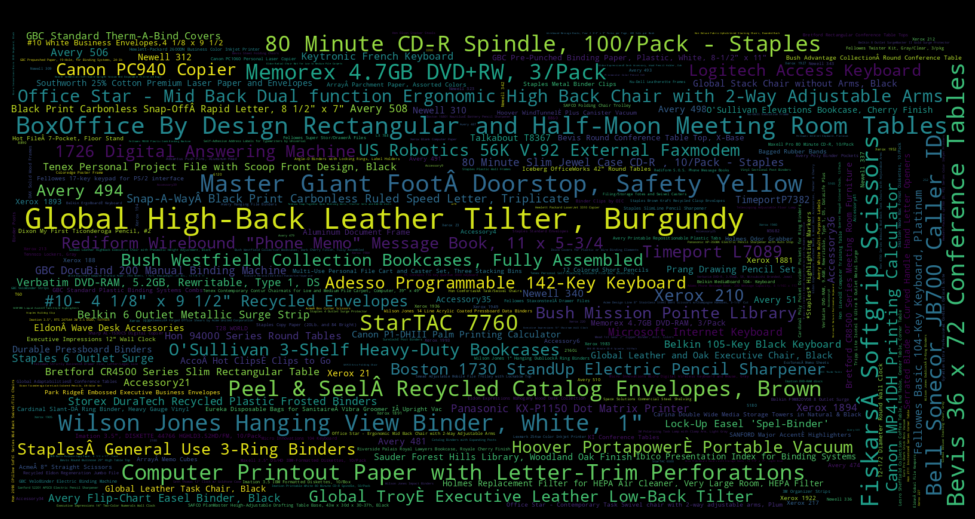

In [16]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

# Пример списка стоп-слов (можно изменять по необходимости)
stop_words_list = set(STOPWORDS)

# Список колонок, для которых создадим облако слов
columns = ['REGION', 'CUSTOMERSEGMENT', 'PRODUCTCATEGORY','PRODUCTCONTAINER','PRODUCTNAME']

# Создаем цикл для обработки каждой колонки
for col in columns:
    # Генерируем частотный словарь из текущего столбца
    counts = Counter(df[col].dropna().apply(lambda x: str(x)))

    # Создаем объект WordCloud с настройками
    wcc = WordCloud(
        background_color="black",  # Цвет фона (черный)
        width=1600, height=800,  # Размер изображения
        max_words=2000,  # Максимальное количество слов в облаке
        stopwords=stop_words_list  # Удаляем распространенные слова
    )

    # Генерируем облако слов на основе частоты встречаемости значений в колонке
    wcc.generate_from_frequencies(counts)

    # Отображаем облако слов
    plt.figure(figsize=(10, 5), facecolor='k')  # Размер графика, черный фон вокруг
    plt.imshow(wcc, interpolation='bilinear')  # Отображаем изображение
    plt.axis("off")  # Отключаем оси координат
    plt.title(f"Word Cloud for {col}")  # Добавляем заголовок
    plt.tight_layout(pad=0)  # Минимизируем отступы
    plt.show()
    print()



<Axes: >

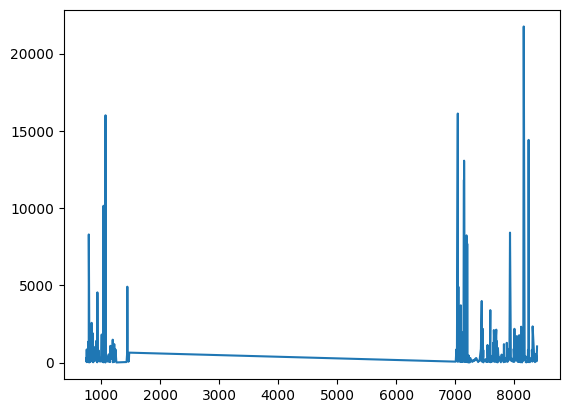

In [17]:

gr_1 =df[(df['PRODUCTCATEGORY'] == 'Office Supplies') & (df['REGION'] == 'West') & (df['CUSTOMERSEGMENT'] =='Corporate')]['SALES']
gr_1.plot()

<ipython-input-18-252b79d8b9d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_1["Date"] = pd.to_datetime(gr_1["Date"])
<ipython-input-18-252b79d8b9d9>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gr_1_monthly = gr_1["SALES"].resample("M").sum()


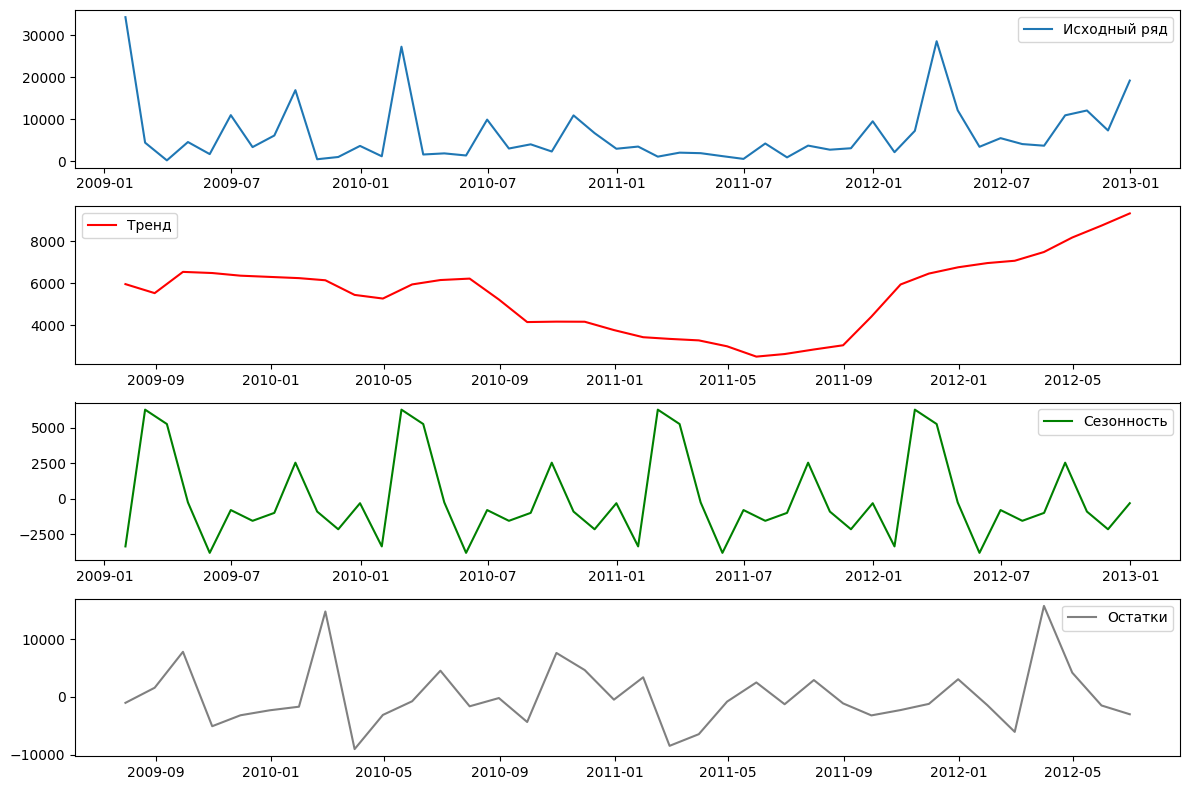

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Фильтруем данные по категории "Sports" и сегменту "Occasional"
gr_1 =df[(df['PRODUCTCATEGORY'] == 'Office Supplies') & (df['REGION'] == 'West') & (df['CUSTOMERSEGMENT'] =='Corporate')]

# Преобразуем 'Date' в формат datetime и устанавливаем индексом
gr_1["Date"] = pd.to_datetime(gr_1["Date"])
gr_1 = gr_1.set_index("Date")

# Агрегируем данные по месяцам, чтобы уменьшить случайные колебания
gr_1_monthly = gr_1["SALES"].resample("M").sum()

# Выполняем декомпозицию временного ряда
decomposition = seasonal_decompose(gr_1_monthly, model='additive', period=12)

# Визуализация компонентов временного ряда
plt.figure(figsize=(12, 8))

# Исходный временной ряд
plt.subplot(4, 1, 1)
plt.plot(gr_1_monthly, label="Исходный ряд")
plt.legend()

# Тренд
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Тренд", color='red')
plt.legend()

# Сезонность
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Сезонность", color='green')
plt.legend()

# Остатки
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Остатки", color='gray')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
gr_1_monthly

,SALES
Date,
2009-01-31,34309.30
2009-02-28,4454.04
2009-03-31,244.50
2009-04-30,4606.36
2009-05-31,1733.06
2009-06-30,11005.28
2009-07-31,3401.56
2009-08-31,6157.07
2009-09-30,16942.47


In [20]:
# Убедимся, что индекс отсортирован
gr_1.index = pd.to_datetime(gr_1.index)
gr_1 = gr_1.sort_index()

# Теперь можно сделать срез по датам
gr_1.loc["2000-09":"2011-06"]


,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,SHIPPINGCOSTS,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN
Date,,,,,,,,,,,,,,,,
2009-01-02,1/2/09,Low,32,4902.38,0.05,Regular Air,1438.49,7.07,British Columbia,West,Corporate,Office Supplies,Storage & Organization,"Dual Level, Single-Width Filing Carts",Small Box,0.59
2009-01-08,1/8/09,High,25,21752.01,0.03,Regular Air,9296.35,19.99,Alberta,West,Corporate,Office Supplies,Binders and Binder Accessories,GBC DocuBind TL300 Electric Binding System,Small Box,0.38
2009-01-10,1/10/09,Not Specified,16,112.81,0.02,Regular Air,-85.23,9.17,Alberta,West,Corporate,Office Supplies,Paper,Xerox 1996,Small Box,0.37
2009-01-10,1/10/09,Critical,32,4906.85,0.09,Regular Air,1907.94,19.99,British Columbia,West,Corporate,Office Supplies,Envelopes,Multimedia Mailers,Small Box,0.39
2009-01-15,1/15/09,Not Specified,48,447.89,0.00,Regular Air,-26.78,6.19,British Columbia,West,Corporate,Office Supplies,Binders and Binder Accessories,Avery Printable Repositionable Plastic Tabs,Small Box,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-26,5/26/11,Not Specified,42,286.73,0.05,Regular Air,-141.51,7.49,British Columbia,West,Corporate,Office Supplies,Paper,Xerox 220,Small Box,0.37
2011-05-28,5/28/11,Low,44,246.00,0.10,Regular Air,-207.36,7.96,British Columbia,West,Corporate,Office Supplies,Paper,Xerox 196,Small Box,0.36
2011-06-06,6/6/11,Not Specified,18,129.77,0.01,Regular Air,-99.42,9.68,Alberta,West,Corporate,Office Supplies,Paper,Xerox 1993,Small Box,0.36


0:	learn: 1981.1420282	test: 1339.1764424	best: 1339.1764424 (0)	total: 13.4ms	remaining: 13.4s
200:	learn: 163.0828819	test: 642.8724727	best: 642.1874633 (190)	total: 994ms	remaining: 3.95s
400:	learn: 55.2682572	test: 603.9845420	best: 603.9317194 (399)	total: 1.48s	remaining: 2.21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 599.9990769
bestIteration = 502

Shrink model to first 503 iterations.
0:	learn: 1981.1420282	test: 1339.1764424	best: 1339.1764424 (0)	total: 3.13ms	remaining: 3.13s
200:	learn: 163.0828819	test: 642.8724727	best: 642.1874633 (190)	total: 423ms	remaining: 1.68s
400:	learn: 55.2682572	test: 603.9845420	best: 603.9317194 (399)	total: 877ms	remaining: 1.31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 599.9990769
bestIteration = 502

Shrink model to first 503 iterations.

 Train Set:
MSE: 145620.67
RMSE: 381.60
R²: 0.9637

 Validation Set:
MSE: 359998.92
RMSE: 600.00
R²: 0.7975

 Test Set:
MSE: 986122.30
RMSE: 993.04
R²:

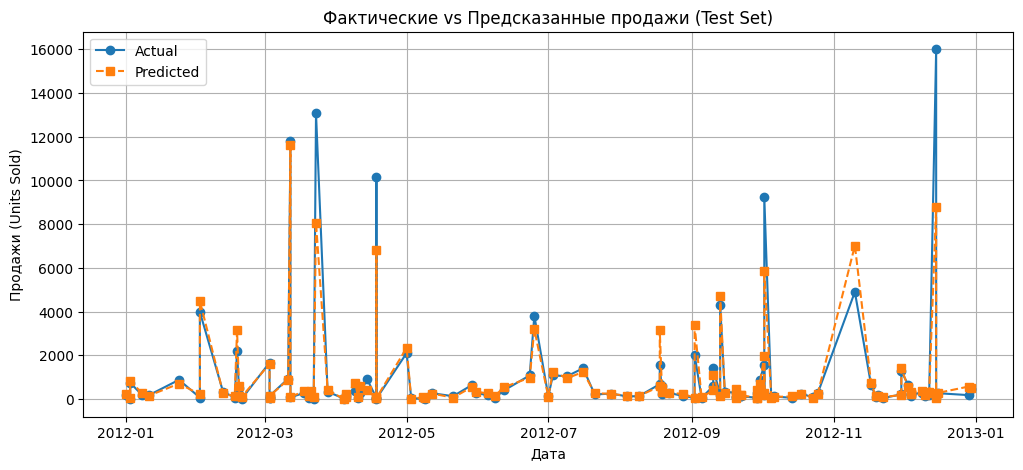

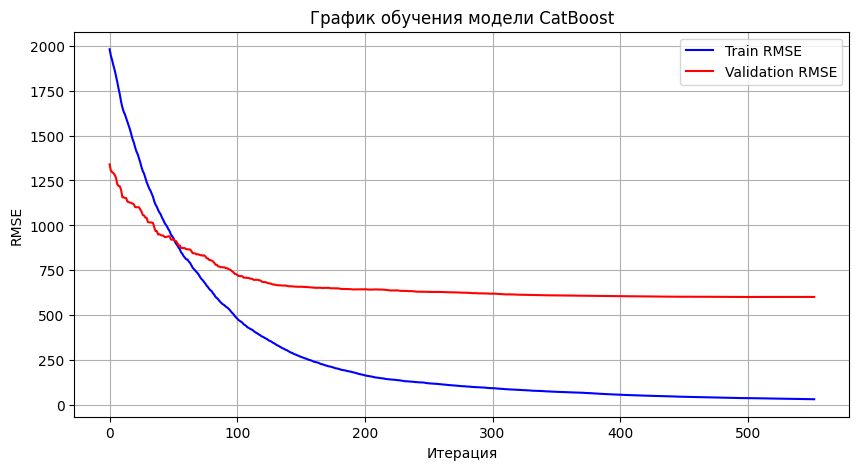

In [27]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


gr_1 = gr_1.sort_index()
# gr_1 = gr_1.drop(['ORDERDATE'],axis=1)


# Разделение данных на train, validation, test
train = gr_1.loc["2009-09-01":"2011-06-30"]  # Обучение: 2022 - 06.2024
val = gr_1.loc["2011-06-01":"2011-12-31"]  # Валидация: 07.2024 - 12.2024
test = gr_1.loc["2012-01-01":]  # Тест: 2025

# Определяем признаки (все кроме `Units_Sold`) и целевую переменную
X_train, y_train = train.drop(columns=["SALES"]), train["SALES"]
X_val, y_val = val.drop(columns=["SALES"]), val["SALES"]
X_test, y_test = test.drop(columns=["SALES"]), test["SALES"]

# Категориальные признаки
cat_features = ['ORDERPRIOTORITY', 'SHIPMODE', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY','PRODUCTNAME',	'PRODUCTCONTAINER']

# Обучение модели CatBoost
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function="RMSE", cat_features=cat_features, verbose=200)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# Предсказания
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Обучаем модель и сохраняем историю ошибок
train_history = model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50,
    use_best_model=True
)

# Оценка модели
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {dataset_name} Set:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

evaluate_model(y_train, y_pred_train, "Train")
evaluate_model(y_val, y_pred_val, "Validation")
evaluate_model(y_test, y_pred_test, "Test")

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual", marker="o", linestyle="-")
plt.plot(test.index, y_pred_test, label="Predicted", marker="s", linestyle="--")
plt.legend()
plt.title("Фактические vs Предсказанные продажи (Test Set)")
plt.xlabel("Дата")
plt.ylabel("Продажи (Units Sold)")
plt.grid()
plt.show()

# График обучения модели
plt.figure(figsize=(10, 5))
plt.plot(train_history.get_evals_result()["learn"]["RMSE"], label="Train RMSE", color="blue")
plt.plot(train_history.get_evals_result()["validation"]["RMSE"], label="Validation RMSE", color="red")
plt.xlabel("Итерация")
plt.ylabel("RMSE")
plt.title("График обучения модели CatBoost")
plt.legend()
plt.grid()
plt.show()


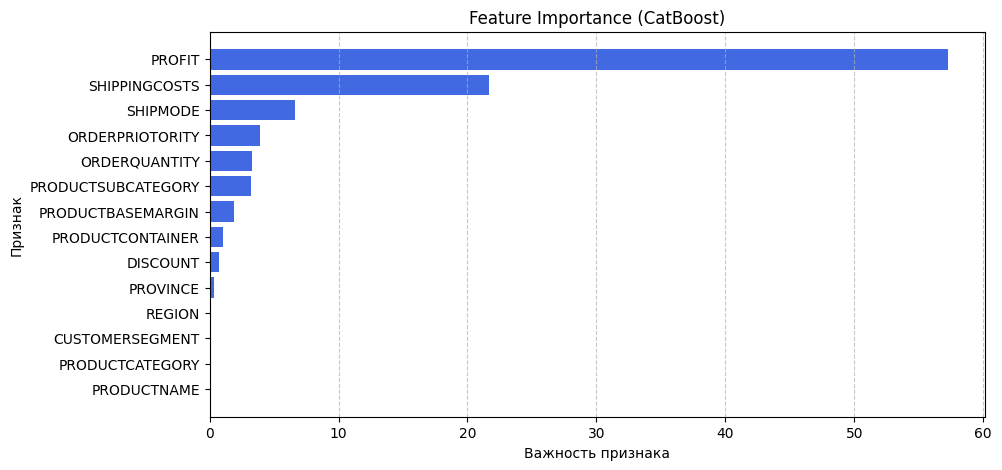

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Получаем важность признаков из модели CatBoost
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Создаем DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Сортируем по важности

# Визуализация важности признаков
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="royalblue")
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Feature Importance (CatBoost)")
plt.gca().invert_yaxis()  # Переворачиваем ось для удобства
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Вывод таблицы


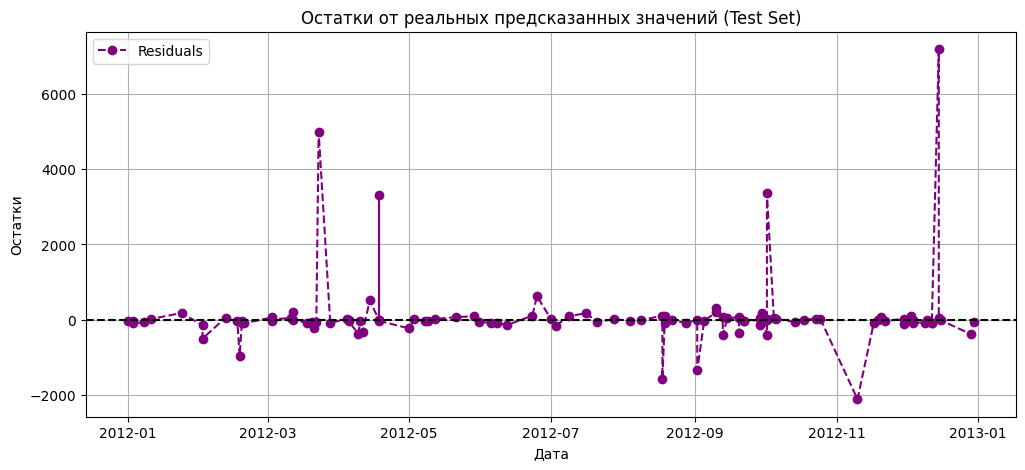

<Figure size 1200x500 with 0 Axes>

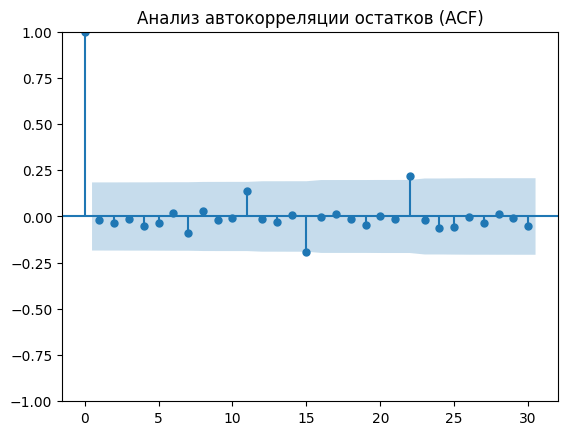


Ljung-Box Test Results:
      lb_stat  lb_pvalue
30  18.164044   0.955817

 Остатки являются белым шумом (p-value >= 0.05).


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Вычисляем остатки
residuals = y_test - y_pred_test

# График остатков
plt.figure(figsize=(12, 5))
plt.plot(test.index, residuals, label="Residuals", marker="o", linestyle="--", color="purple")
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Остатки от реальных предсказанных значений (Test Set)")
plt.xlabel("Дата")
plt.ylabel("Остатки")
plt.grid()
plt.legend()
plt.show()

# Анализ автокорреляции остатков (ACF)
plt.figure(figsize=(12, 5))
plot_acf(residuals, lags=30)  # Автокорреляция на первых 40 лагах
plt.title("Анализ автокорреляции остатков (ACF)")
plt.show()

# Тест на белый шум: Ljung-Box тест
lb_test = acorr_ljungbox(residuals, lags=[30], return_df=True)  # тест на 40 лагах

# Выводим результаты теста
print("\nLjung-Box Test Results:")
print(lb_test)

# Проверка p-value
p_value = lb_test['lb_pvalue'][30]  # Извлекаем p-value для 40 лага

# Интерпретация
if p_value < 0.05:
    print("\n Остатки НЕ являются белым шумом (p-value < 0.05).")
else:
    print("\n Остатки являются белым шумом (p-value >= 0.05).")
